In [2]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot

from pandas.io.json import json_normalize

In [1]:
import pickle

pkl_file = open('FBO.pkl', 'rb')

or_df = pickle.load(pkl_file)

In [3]:
or_df.head()

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
2144901,2012-07-05 22:00:00+00:00,FB.O,Facebook Inc,10036688.0,31.47,31.32,0.008654,0.013592,NaN,NaN,-0.004114,-0.018797,NaN,NaN,-0.081106,1.0
2146606,2012-07-06 22:00:00+00:00,FB.O,Facebook Inc,10949006.0,31.73,31.44,0.008262,0.003831,0.015405,0.004763,-0.003455,-0.007262,NaN,NaN,-0.116958,1.0
2148309,2012-07-09 22:00:00+00:00,FB.O,Facebook Inc,17785180.0,32.17,32.10,0.013867,0.020992,0.015065,0.020124,-0.026626,-0.009565,NaN,NaN,-0.111803,1.0
2150013,2012-07-10 22:00:00+00:00,FB.O,Facebook Inc,14276996.0,31.47,32.43,-0.021759,0.010280,-0.015475,0.010127,-0.018403,-0.013686,NaN,NaN,-0.096991,1.0
2151716,2012-07-11 22:00:00+00:00,FB.O,Facebook Inc,13027752.0,30.97,31.48,-0.015888,-0.029294,-0.015876,-0.029331,-0.064350,-0.036720,NaN,NaN,-0.092014,1.0


In [4]:
print(or_df.shape)
print('---------')
print("From:", or_df.time.min())
print("To  :", or_df.time.max())
print('---------')
print(or_df.assetCode.unique())

(1131, 16)
---------
From: 2012-07-05 22:00:00+00:00
To  : 2016-12-30 22:00:00+00:00
---------
['FB.O']


In [3]:
df = or_df[['time', 'volume', 'close']]
df['date'] = pd.to_datetime(df.time).dt.date

df.head()

/home/bot/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,time,volume,close,date
2144901,2012-07-05 22:00:00+00:00,10036688.0,31.47,2012-07-05
2146606,2012-07-06 22:00:00+00:00,10949006.0,31.73,2012-07-06
2148309,2012-07-09 22:00:00+00:00,17785180.0,32.17,2012-07-09
2150013,2012-07-10 22:00:00+00:00,14276996.0,31.47,2012-07-10
2151716,2012-07-11 22:00:00+00:00,13027752.0,30.97,2012-07-11


In [4]:
# filter data

df = df.sort_values(by=['date'])
df = df.reset_index()

df = df.drop(['index'], axis=1)

df.head()

,time,volume,close,date
0,2012-07-05 22:00:00+00:00,10036688.0,31.47,2012-07-05
1,2012-07-06 22:00:00+00:00,10949006.0,31.73,2012-07-06
2,2012-07-09 22:00:00+00:00,17785180.0,32.17,2012-07-09
3,2012-07-10 22:00:00+00:00,14276996.0,31.47,2012-07-10
4,2012-07-11 22:00:00+00:00,13027752.0,30.97,2012-07-11


In [7]:
df.isna().sum()

time      0
volume    0
close     0
date      0
dtype: int64

In [5]:
# new feature
# 1. difference 1 day
df['diff_1'] = [df.close[i] - df.close[i-1] if i>=1 else 0 for i in df.index]


In [9]:
df.tail()

,time,volume,close,date,diff_1,diff_5
1126,2016-12-23 22:00:00+00:00,10889985.0,117.27,2016-12-23,-0.13,-2.60
1127,2016-12-27 22:00:00+00:00,12051481.0,118.01,2016-12-27,0.74,-1.23
1128,2016-12-28 22:00:00+00:00,12087377.0,116.92,2016-12-28,-1.09,-2.17
1129,2016-12-29 22:00:00+00:00,9934873.0,116.35,2016-12-29,-0.57,-2.69
1130,2016-12-30 22:00:00+00:00,18684106.0,115.05,2016-12-30,-1.30,-2.35


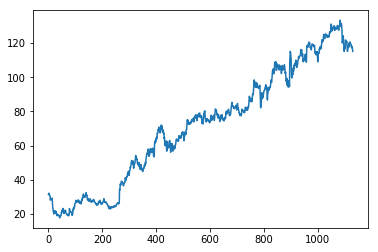

In [10]:
df.close.plot()

### ==> TREND tăng giá

# ARIMA

In [5]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

## Describe diff_1

count    1131.000000
mean        0.073899
std         1.439707
min        -7.170000
25%        -0.600000
50%         0.060000
75%         0.784500
max        14.660000
Name: diff_1, dtype: float64


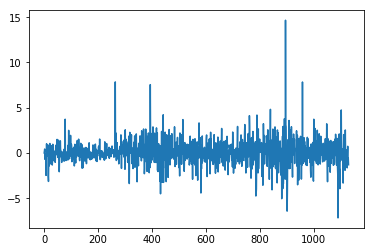

In [77]:
print(df.diff_1.describe())
df.diff_1.plot()

/home/bot/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


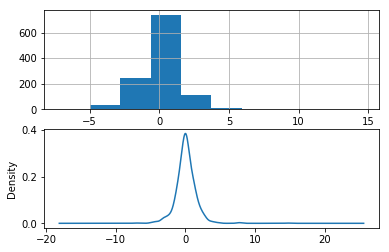

In [78]:
pyplot.figure(1)
pyplot.subplot(211)
df.diff_1.hist()
pyplot.subplot(212)
df.diff_1.plot(kind='kde')
pyplot.show()

### ==> DIFF_1: mean ~ 0, PP gần chuẩn

<Figure size 864x1152 with 0 Axes>

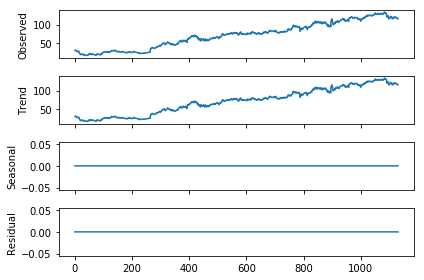

In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose

pyplot.figure(figsize=[12,16])
result = seasonal_decompose(df.close, model='additive', freq=1)
result.plot()
pyplot.show()

### CLOSE: TREND tăng, no SEASONAL


### Kiểm định tính dừng

In [6]:
def chkStationary(series):
    # create a differe
    def difference(dataset):
        diff = list()
        for i in range(1, len(dataset)):
            value = dataset[i] - dataset[i - 1]
            diff.append(value)
        return Series(diff)

    X = series.values
    # difference data
    stationary = difference(X)
    stationary.index = series.index[1:]
    # check if stationary
    result = adfuller(stationary)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [123]:
chkStationary(df.close)

ADF Statistic: -15.643280
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


### p-value=0 -> is STATIONARY
### ==> chọn d=1(ARIMA model)

# ARIMA model

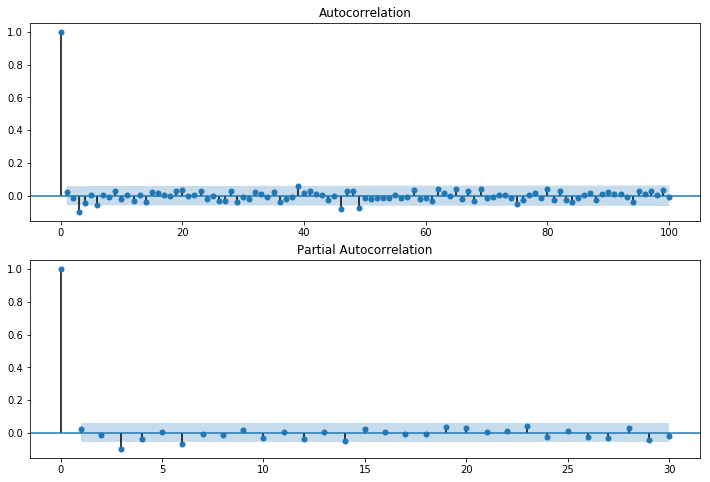

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure(figsize=[12,8])
pyplot.subplot(211)
plot_acf(df.diff_1, ax=pyplot.gca(), lags=100)
pyplot.subplot(212)
plot_pacf(df.diff_1, ax=pyplot.gca(), lags=30)
pyplot.show()

#### ==> Significant ACF: 
#### ==> Significant p-ACF: 0, 1

In [8]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

In [7]:
# prepare Train-test
from datetime import datetime

test_day = datetime(2016, 10, 1).date()
idx_test = df[df.date >= test_day][0:1].index[0]

X = df.close.values

train = X[:idx_test]
test = X[idx_test:]
# df_train = df[df.date < test_day][5:]
# df_test = df[df.date >= test_day]

# print('train:', df_train.shape)
# print('test:', df_test.shape)

In [9]:
def runArima_5d(order, train, test):
    # walk-forward validation
    history = [x for x in train]
    predictions = list()
    predictions.append(0)
    predictions.append(0)
    predictions.append(0)
    predictions.append(0)
    for i in range(len(test)):
        # predict
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast(steps=5)[0][4]
        predictions.append(yhat)
        # observation
        obs = test[i]
        history.append(obs)
        # print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

    # report performance
    mse = mean_squared_error(test[4:], predictions[4:-4])
    rmse = sqrt(mse)
    print('(p,d,q)=',order,'RMSE: %.3f' % rmse)
    
    return rmse

In [12]:
import sys
min_rmse = sys.maxsize
min_order = ''

for p in range(5):
    for q in range(4):
        try:
            rmse = runArima_5d((p,1,q), train, test)
            if rmse < min_rmse:
                min_rmse = rmse
                min_order = (p,1,q)
        except:
            print('(p,d,q)=',(p,1,q),'Error!!')

print('Min RMSE:', min_rmse)
print('Min order:', min_order)

(p,d,q)= (0, 1, 0) RMSE: 4.007
(p,d,q)= (0, 1, 1) RMSE: 4.010
(p,d,q)= (0, 1, 2) RMSE: 4.010
(p,d,q)= (0, 1, 3) RMSE: 3.997
(p,d,q)= (1, 1, 0) RMSE: 4.010
(p,d,q)= (1, 1, 1) Error!!
(p,d,q)= (1, 1, 2) Error!!
(p,d,q)= (1, 1, 3) Error!!
(p,d,q)= (2, 1, 0) RMSE: 4.008
(p,d,q)= (2, 1, 1) RMSE: 4.056
(p,d,q)= (2, 1, 2) Error!!
(p,d,q)= (2, 1, 3) Error!!
(p,d,q)= (3, 1, 0) RMSE: 3.995
(p,d,q)= (3, 1, 1) RMSE: 4.060
(p,d,q)= (3, 1, 2) RMSE: 4.057
(p,d,q)= (3, 1, 3) Error!!
(p,d,q)= (4, 1, 0) RMSE: 3.999
(p,d,q)= (4, 1, 1) RMSE: 3.903


/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/

/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(p,d,q)= (4, 1, 2) Error!!


/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/bot/

(p,d,q)= (4, 1, 3) RMSE: 3.987
Min RMSE: 3.90281889004897
Min order: (4, 1, 1)


In [10]:
history = [x for x in train]
predictions = list()
predictions.append(0)
predictions.append(0)
predictions.append(0)
predictions.append(0)
for i in range(len(test)):
    # predict 
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast(steps=5)[0][4]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    
mse = mean_squared_error(test[4:], predictions[4:-4])
rmse = sqrt(mse)
print('(p,d,q)=',(0,1,0),'RMSE: %.3f' % rmse)    

(p,d,q)= (0, 1, 0) RMSE: 4.007


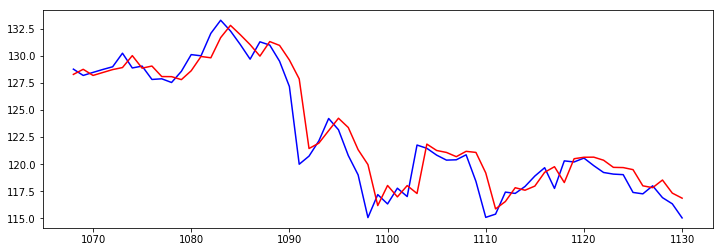

In [16]:
# x = np.arange(len(X) -)
x1 = np.arange(idx_test - 20, idx_test)
x2 = np.arange(idx_test, len(X))

pyplot.figure(figsize=[12,4])
pyplot.plot(x2, test, 'b-', x2, predictions[4:], 'r-')
pyplot.show()